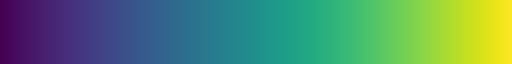

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.color_palette("viridis", as_cmap=True)


## ROC Curve 

In [9]:
import pandas as pd
from Helpers import helpers
mi_scores = helpers.load_dataset('./results/nd-laplace-truncated/seeds-dataset/privacy_scores.csv')
mi_scores_laplace = helpers.load_dataset('./results/nd-laplace/seeds-dataset/privacy_scores.csv')
mi_scores_piecewise = helpers.load_dataset('./results/nd-piecewise/seeds-dataset/privacy_scores.csv')

mi_scores.head()

,epsilon,shokri_mi_adv,attack_adv,tpr,fpr,run
0,0.01,0.153846,0.583333,[0. 0.53846154 1. ],[0. 0.38461538 1. ],0
1,0.01,0.384615,0.727273,[0. 0.61538462 1. ],[0. 0.23076923 1. ],1
2,0.01,0.269231,0.733333,[0. 0.42307692 1. ],[0. 0.15384615 1. ],2
3,0.01,0.307692,1.000000,[0. 0.30769231 1. ],[0. 0. 1.],3
4,0.01,-0.038462,0.444444,[0. 0.15384615 1. ],[0. 0.19230769 1. ],4


In [10]:
from sklearn.metrics import RocCurveDisplay
from itertools import cycle

def prepare_for_roc(mi_scores):
    mi_scores_for_display = mi_scores.copy()
    mi_scores_eps_1 = mi_scores_for_display[mi_scores_for_display['epsilon'] == 0.1]
    mi_scores_eps_1['tpr'] = mi_scores_eps_1['tpr'].apply(lambda x: float(x.strip('[]').split()[1]))
    mi_scores_eps_1['fpr'] = mi_scores_eps_1['fpr'].apply(lambda x: float(x.strip('[]').split()[1]))
    extra_point = pd.DataFrame({'fpr': [0.0], 'tpr': [0.0]})
    #extra_point2 = pd.DataFrame({'fpr': [1.0], 'tpr': [1.0]})
    return pd.concat([mi_scores_eps_1, extra_point], ignore_index=True)
def display_roc_plot(mi_scores, types):
    #fig, ax = plt.subplots(figsize=(8, 6))
    #display = RocCurveDisplay(fpr=mi_scores_for_display['fpr'].sort_values(), tpr=mi_scores_for_display['tpr'].sort_values()).plot(ax)
    line_styles = cycle(['-', '--', '-.', ':'])

    # sns.lineplot(x=mi_scores['fpr'].sort_values(), y=mi_scores['tpr'].sort_values())
    for type in types:
        linestyle = next(line_styles)
        mi_scores_for_display = prepare_for_roc(mi_scores[type])
        plt.plot(mi_scores_for_display['fpr'].sort_values(), mi_scores_for_display['tpr'].sort_values(), lw=2, label=type, linestyle=linestyle)
    #plt.plot(mi_scores['fpr'].sort_values(), mi_scores['tpr'].sort_values(), lw=2)
    # disabling the offset on y axis

    plt.title("ROC Curve")
    plt.ylabel("True Positive Rate")
    plt.xlabel("Flase Positive Rate")
    plt.plot([0, 1], [0, 1],'r--', label='Random Guess')
    plt.xlim([-0.05, 1.02])  # Set the x-axis limits from 0 to 1
    plt.ylim([-0.05, 1.02])  # Set the y-axis limits from 0 to 1
    plt.legend(loc="lower right")
    plt.show()

In [11]:
score_dict = {'nd-laplace-truncated': mi_scores, 'nd-laplace': mi_scores_laplace, 'piecewise': mi_scores_piecewise}
types = ['nd-laplace-truncated', 'nd-laplace', 'piecewise']

/tmp/ipykernel_711/3751910405.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mi_scores_eps_1['tpr'] = mi_scores_eps_1['tpr'].apply(lambda x: float(x.strip('[]').split()[1]))
/tmp/ipykernel_711/3751910405.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mi_scores_eps_1['fpr'] = mi_scores_eps_1['fpr'].apply(lambda x: float(x.strip('[]').split()[1]))


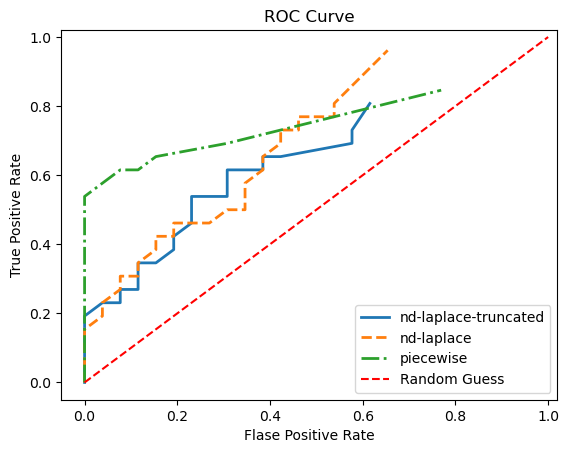

In [12]:
display_roc_plot(score_dict, types)


In [13]:
heart_dataset = helpers.load_dataset('./results/nd-laplace-truncated/heart-dataset/privacy_scores.csv')
heart_dataset_laplace = helpers.load_dataset('./results/nd-laplace/heart-dataset/privacy_scores.csv')
heart_dataset_piecewise = helpers.load_dataset('./results/nd-piecewise/heart-dataset/privacy_scores.csv')


/tmp/ipykernel_711/3751910405.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mi_scores_eps_1['tpr'] = mi_scores_eps_1['tpr'].apply(lambda x: float(x.strip('[]').split()[1]))
/tmp/ipykernel_711/3751910405.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mi_scores_eps_1['fpr'] = mi_scores_eps_1['fpr'].apply(lambda x: float(x.strip('[]').split()[1]))


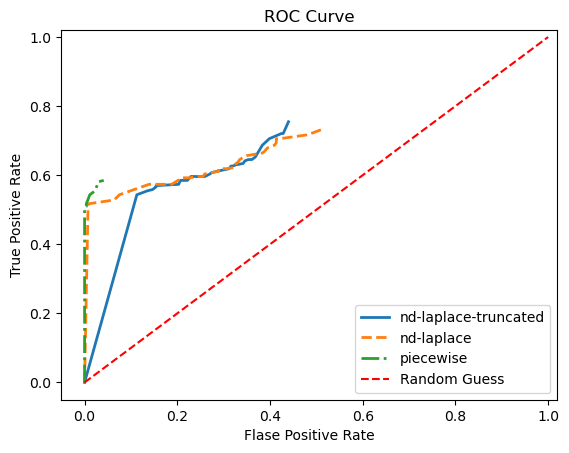

In [14]:
heart_score_to_predict = {'nd-laplace-truncated': heart_dataset, 'nd-laplace': heart_dataset_laplace, 'piecewise': heart_dataset_piecewise}
display_roc_plot(heart_score_to_predict, types)